### **Polygons and masks**

In [ ]:
!mkdir ./data
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./data

--2022-08-12 21:53:51--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.197.17
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.197.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  43.3MB/s    in 6.0s    

2022-08-12 21:53:58 (40.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: ./data/annotations/instances_train2017.json  
  inflating: ./data/annotations/instances_val2017.json  
  inflating: ./data/annotations/captions_train2017.json  
  inflating: ./data/annotations/captions_val2017.json  
  inflating: ./data/annotations/person_keypoints_train2017.json  
  inflating: ./data/annotations/person_keypoints_val2017.json  


In [ ]:
data_dir = './data'
data_type = 'val2017'
annotation_file = '{}/annotations/instances_{}.json'.format(data_dir, data_type)

In [ ]:
from pycocotools.coco import COCO

coco = COCO(annotation_file)

catids = coco.getCatIds(catNms=['person','dog','skateboard'])
print(f'catids : {catids}')

imgids = coco.getImgIds(catIds=catids)
print(f'imgids : {imgids}')

image_info = coco.loadImgs(324158)[0]
print(f'image_info : {image_info}')

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
catids : [1, 18, 41]
imgids : [549220, 324158, 279278]
image_info : {'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


In [ ]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

image_url = image_info['coco_url']
image_path = './data/' + image_info['file_name']

def download_image(url, path):
  urllib.request.urlretrieve(url, path) 

download_image(image_url, image_path)
image_array = cv2.imread(image_path)
image_array_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 12))
plt.imshow(image_array_rgb)
plt.title('image_array_rgb', fontsize=12)
plt.axis('off')
plt.show()

##### **1) coco.showAnns()**

In [ ]:
annids = coco.getAnnIds(imgIds=image_info['id'], catIds=catids, iscrowd=None)
print(f'annids : {annids}')

annids : [10673, 638724, 2162813]


In [ ]:
anns = coco.loadAnns(annids)
anns

[{'area': 759.3375500000002,
  'bbox': [196.51, 183.36, 23.95, 53.02],
  'category_id': 18,
  'id': 10673,
  'image_id': 324158,
  'iscrowd': 0,
  'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    2

In [ ]:
plt.figure(figsize=(10, 12))
plt.imshow(image_array_rgb)
plt.title('coco.showAnns()', fontsize=12)
plt.axis('off')

coco.showAnns(anns)

##### **2) cv2.polylines()**

In [ ]:
ann_seg_list = anns[2]['segmentation'][0]
print(f'ann_seg_list : {ann_seg_list}')
print(f'ann_seg_list type : {type(ann_seg_list)} / ann_seg_list len : {len(ann_seg_list)}')

ann_seg_list : [228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]
ann_seg_list type : <class 'list'> / ann_seg_list len : 52


In [ ]:
polygon_x = [x for index, x in enumerate(ann_seg_list) if index % 2 == 0]
polygon_y = [x for index, x in enumerate(ann_seg_list) if index % 2 == 1]
print(f'polygon_x : {polygon_x}')
print(f'polygon_y : {polygon_y}')

polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
print(f'polygon_xy : {polygon_xy}')

polygon_x : [228.43, 229.63, 224.24, 220.65, 207.49, 202.71, 205.7, 218.86, 213.47, 225.44, 236.8, 236.8, 254.15, 263.72, 274.49, 271.5, 266.12, 257.14, 254.75, 261.93, 262.53, 261.33, 268.51, 247.57, 245.78, 229.03]
polygon_y : [247.9, 206.62, 191.07, 179.7, 169.53, 163.55, 133.04, 121.68, 104.33, 96.55, 106.12, 116.29, 127.06, 150.39, 166.54, 177.31, 181.5, 159.96, 177.91, 192.27, 216.79, 234.14, 249.1, 246.11, 249.69, 248.5]
polygon_xy : [[228.43, 247.9], [229.63, 206.62], [224.24, 191.07], [220.65, 179.7], [207.49, 169.53], [202.71, 163.55], [205.7, 133.04], [218.86, 121.68], [213.47, 104.33], [225.44, 96.55], [236.8, 106.12], [236.8, 116.29], [254.15, 127.06], [263.72, 150.39], [274.49, 166.54], [271.5, 177.31], [266.12, 181.5], [257.14, 159.96], [254.75, 177.91], [261.93, 192.27], [262.53, 216.79], [261.33, 234.14], [268.51, 249.1], [247.57, 246.11], [245.78, 249.69], [229.03, 248.5]]


In [ ]:
import numpy as np

draw_image = image_array_rgb.copy()
polygon_xy = np.array(polygon_xy, np.int32)
draw_image_polylines = cv2.polylines(draw_image, [polygon_xy], True, (0, 255, 0), 2)

plt.figure(figsize=(10, 12))
plt.imshow(draw_image_polylines)
plt.title('cv2.polylines()', fontsize=12)
plt.axis('off')
plt.show()

##### **3) cv2.fillPoly()**

In [ ]:
draw_image_fillpoly = cv2.fillPoly(draw_image, [polygon_xy], (0, 255, 0))

plt.figure(figsize=(10, 12))
plt.imshow(draw_image_fillpoly)
plt.title('cv2.fillPoly()', fontsize=12)
plt.axis('off')
plt.show()

##### **4) coco.annToMask()**

In [ ]:
ann_to_mask = coco.annToMask(anns[2])

plt.figure(figsize=(10, 12))
plt.imshow(ann_to_mask)
plt.title('coco.annToMask()', fontsize=12)
plt.axis('off')
plt.show()

##### **5) polygon > mask**

In [ ]:
polygon_to_mask = cv2.fillPoly(np.zeros(image_array.shape[:2]), [polygon_xy], 1)

plt.figure(figsize=(10, 12))
plt.imshow(polygon_to_mask)
plt.title('polygon > mask', fontsize=12)
plt.axis('off')
plt.show()

##### **6) bool > mask**

In [ ]:
bool_to_mask = polygon_to_mask.astype(bool)

plt.figure(figsize=(10, 12))
plt.imshow(bool_to_mask)
plt.title('bool > mask', fontsize=12)
plt.axis('off')
plt.show()

##### **7) cv2.bitwise_and()**

In [ ]:
draw_image = image_array_rgb.copy()
draw_image_mask_int = (bool_to_mask * 255).astype('uint8')
draw_image_bitwise_and = cv2.bitwise_and(draw_image, draw_image, mask=draw_image_mask_int)

plt.figure(figsize=(10, 12))
plt.imshow(draw_image_bitwise_and)
plt.title('cv2.bitwise_and()', fontsize=12)
plt.axis('off')
plt.show()

##### **8) cv2.findContours & cv2.drawContours**

In [ ]:
contours, hierarchy = cv2.findContours(draw_image_mask_int, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
draw_image_contours = cv2.drawContours(draw_image, contours, -1, (255, 0, 0), 2)

plt.figure(figsize=(10, 12))
plt.imshow(draw_image_contours)
plt.title('cv2.findContours() & cv2.drawContours()', fontsize=12)
plt.axis('off')
plt.show()

### **2. Functionalize the code**

In [ ]:
from pycocotools.coco import COCO
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_poolygon_xy(annotations):
  polygon_x = [x for index, x in enumerate(annotations) if index % 2 == 0]
  polygon_y = [x for index, x in enumerate(annotations) if index % 2 == 1]
  polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
  polygon_xy = np.array(polygon_xy, np.int32)
  return polygon_xy

def get_mask(image_shape, polygon_xy):
  mask_shape = np.zeros(image_shape)
  polygon_to_mask = cv2.fillPoly(mask_shape, [polygon_xy], 1)
  return polygon_to_mask

def apply_mask(image_array, mask, color, alpha=0.6):
  for c in range(3):
      image_array[:, :, c] = np.where(mask == 1, image_array[:, :, c] * (1 - alpha) + alpha * color[c] * 255, image_array[:, :, c])
      return image_array

def draw_instance_segmentation(image_array, segmentation_list, color_list, alpha):
  draw_image = image_array.copy()
  draw_image_shape = draw_image.shape[:2]

  for index, ann_seg in enumerate(segmentation_list):
    polygon_xy = get_poolygon_xy(ann_seg)
    polygon_to_mask = get_mask(draw_image_shape, polygon_xy)

    color_object = color_list[np.random.randint(len(color_list))]
    color_contour = color_list[np.random.randint(len(color_list))]

    masked_draw_image = apply_mask(draw_image, polygon_to_mask, color_object, alpha)
    
    draw_image_mask_int = (polygon_to_mask * 255).astype('uint8')
    contours, hierarchy = cv2.findContours(draw_image_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    draw_image_contours = cv2.drawContours(masked_draw_image, contours, -1, color_contour, 2)
  return draw_image_contours

In [ ]:
coco = COCO(annotation_file)

catids = coco.getCatIds(catNms=['person','dog','skateboard'])
print(f'catids : {catids}')

imgids = coco.getImgIds(catIds=catids)
print(f'imgids : {imgids}')

image_info = coco.loadImgs(324158)[0]
print(f'image_info : {image_info}')

loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
catids : [1, 18, 41]
imgids : [549220, 324158, 279278]
image_info : {'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


In [ ]:
image_url = image_info['coco_url']
image_path = './data/' + image_info['file_name']

def download_image(url, path):
  urllib.request.urlretrieve(url, path) 

download_image(image_url, image_path)
image_array = cv2.imread(image_path)
image_array_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 12))
plt.imshow(image_array_rgb)
plt.title('image_array_rgb', fontsize=12)
plt.axis('off')
plt.show()

In [ ]:
annids = coco.getAnnIds(imgIds=image_info['id'], catIds=catids, iscrowd=None)
anns = coco.loadAnns(annids)
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(f'ann_seg_list : {ann_seg_list}')

ann_seg_list : [[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16], [223.48, 251.26, 230.81, 246.74, 234.48, 247.6, 241.8, 247.6, 247.41, 243.72, 248.7, 244.15, 252.15, 249.54, 252.15, 254.71,

In [ ]:
color_list = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
masked_image = draw_instance_segmentation(image_array, ann_seg_list, color_list, alpha=0.6)

data_dir = ('./drive/MyDrive/Colab Notebooks/update/dl_cv/6_dl_cv_instance_segmentation/data/draw_instance_segmentation.jpg')
cv2.imwrite(data_dir, masked_image)

True

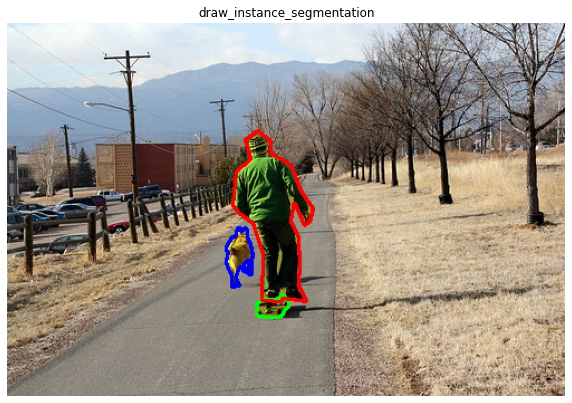

In [ ]:
plt.figure(figsize=(10, 12))
image_output = plt.imread(data_dir)
plt.imshow(image_output)
plt.title('draw_instance_segmentation', fontsize=12)
plt.axis('off')
plt.show()